In [1]:
import anndata
import os
import requests

save_path = "../../data/example_sce.h5ad"
# if not os.path.exists(save_path):
#     response = requests.get("https://go.wisc.edu/69435h")
#     with open(save_path, "wb") as f:
#         f.write(response.content)

example_sce = anndata.read_h5ad(save_path)
example_sce

AnnData object with n_obs × n_vars = 2087 × 100
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'cell_type', 'sizeFactor', 'pseudotime'
    var: 'highly_variable_genes'
    uns: 'X_name', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    layers: 'counts', 'cpm', 'logcounts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# PNMF

In [2]:
from scdesigner.experimental.simulators.pnmf_regression import PNMFRegressionSimulator
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `annda

In [3]:
formula = "~ bs(pseudotime, degree=5)"
model = PNMFRegressionSimulator()
params = model.estimate(example_sce, formula, epochs=200, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [4]:
params["W"] # index=gene?

0             1             2             3   \
Pyy            4.228153e-08  2.162592e-04  6.600834e-09  2.055385e-05   
Iapp           3.852059e-09  1.010543e-01  3.755231e-10  4.151346e-03   
Chgb           1.462003e-09  3.469029e-03  7.008793e-09  4.863656e-04   
Rbp4           3.927661e-08  1.269275e-01  3.131713e-09  2.213276e-04   
Spp1           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                     ...           ...           ...           ...   
Ffar2          1.452790e-02  2.343872e-06  6.647532e-02  6.404326e-04   
Hes6           1.003195e-02  2.565817e-08  2.304054e-02  6.108648e-04   
Serpinh1       2.382607e-04  0.000000e+00  1.676093e-03  4.872162e-07   
Npy            0.000000e+00  5.077982e-10  0.000000e+00  8.375817e-08   
1110012L19Rik  1.565166e-02  2.685379e-09  2.067324e-03  2.594449e-05   

                     4             5             6             7   \
Pyy            0.000043  2.161160e-04  1.748789e-07  2.434303e-04   
Iapp           0.000003  2.618219e-04  2.077421e-08  4.339064e-03   
Chgb           0.018608  4.320988e-04  5.797938e-01  1.539859e-02   
Rbp4           0.013799  4.348765e-03  1.566979e-04  1.720915e-01   
Spp1           0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
...                 ...           ...           ...           ...   
Ffar2          0.007573  4.085229e-05  1.024481e-01  1.575844e-04   
Hes6           0.000010  5.257639e-05  3.383284e-06  7.844868e-06   
Serpinh1       0.000000  3.216380e-06  0.000000e+00  3.901698e-10   
Npy            0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
1110012L19Rik  0.000152  6.512009e-08  1.634180e-02  1.400542e-06   

                         8             9             10            11  \
Pyy            4.647711e-05  2.601084e-09  1.181446e-09  6.069106e-01   
Iapp           3.049874e-05  0.000000e+00  0.000000e+00  1.151727e-03   
Chgb           1.734942e-04  1.128753e-05  0.000000e+00  1.496060e-03   
Rbp4           4.052248e-03  7.957437e-09  4.372993e-10  2.726087e-01   
Spp1           0.000000e+00  0.000000e+00  2.986933e-03  0.000000e+00   
...                     ...           ...           ...           ...   
Ffar2          7.957841e-05  6.840205e-03  6.566155e-04  3.167356e-06   
Hes6           8.949735e-04  7.924974e-04  7.650894e-04  1.447451e-06   
Serpinh1       7.969441e-06  2.346700e-08  2.493653e-02  0.000000e+00   
Npy            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1110012L19Rik  8.464506e-08  1.914805e-02  9.256837e-06  3.763251e-10   

                         12            13            14            15  \
Pyy            5.393330e-05  1.533296e-08  2.626263e-09  7.370828e-03   
Iapp           6.404544e-07  7.759534e-09  0.000000e+00  5.051736e-01   
Chgb           1.037969e-05  2.324155e-08  5.125605e-08  2.251308e-04   
Rbp4           4.599959e-05  1.384964e-06  0.000000e+00  1.710939e-02   
Spp1           4.125875e-09  0.000000e+00  0.000000e+00  0.000000e+00   
...                     ...           ...           ...           ...   
Ffar2          1.153088e-03  2.315484e-04  6.273608e-02  0.000000e+00   
Hes6           9.347136e-04  1.178163e-05  2.176070e-01  4.749464e-09   
Serpinh1       5.862488e-04  1.012892e-05  1.350212e-06  0.000000e+00   
Npy            0.000000e+00  0.000000e+00  0.000000e+00  1.036432e-01   
1110012L19Rik  1.381969e-06  2.233843e-05  2.216401e-01  0.000000e+00   

                         16            17        18        19  
Pyy            9.782673e-06  9.003415e-09  0.000000  0.000101  
Iapp           7.434930e-04  4.843446e-09  0.000000  0.000016  
Chgb           1.222256e-06  0.000000e+00  0.000000  0.004696  
Rbp4           2.272422e-05  2.370643e-09  0.000000  0.005041  
Spp1           1.842615e-09  4.846088e-01  0.000028  0.000000  
...                     ...           ...       ...       ...  
Ffar2          4.240299e-05  1.902021e-07  0.000860  0.017130  
Hes6           8.694203e-03  8.183216e-06  0.095181  

In [5]:
model # __repr__

method: 'PNMFRegression'
    formula: '~ bs(pseudotime, degree=5)'
    parameters: 'a', 'loc', 'beta', 'W'

In [6]:
model.predict(params, example_sce.obs, formula)["a"]

0          1          2          3          4   \
AAACCTGAGAGGGATA  25.214584  20.256111  25.153344  32.180951  29.275836   
AAACCTGGTAAGTGGC  33.252657  12.781722  33.006494  32.670898  22.037191   
AAACGGGCAAAGAATC  22.120915  21.412126  22.263834  31.820844  27.193180   
AAACGGGGTACAGTTC  16.352396  21.014859  17.363815  31.713688  20.497960   
AAACGGGGTGAAATCA  32.782789  11.084403  32.654315  31.623893  18.557209   
...                     ...        ...        ...        ...        ...   
TTTGGTTTCACTTACT  13.421560   5.401035  14.602259  16.439838   4.338350   
TTTGGTTTCCTTTCGG  20.498404  21.747598  20.792636  31.762474  25.286442   
TTTGTCAAGAATGTGT  24.238483  20.679189  24.233549  32.040332  28.829442   
TTTGTCAAGTGACATA  29.121027  18.049493  28.885171  32.849836  29.204665   
TTTGTCAAGTGTGGCA  31.041507   9.440824  31.107245  29.802595  14.788312   

                        5          6          7          8          9   \
AAACCTGAGAGGGATA  7.241380  15.267043  19.920279  25.699448  19.052291   
AAACCTGGTAAGTGGC  5.515374  11.344246  15.102618  20.756569  15.515082   
AAACGGGCAAAGAATC  7.820404  14.357208  21.202601  27.696223  16.808908   
AAACGGGGTACAGTTC  8.581007  11.524139  24.563331  26.545853  10.188469   
AAACGGGGTGAAATCA  5.285766   9.555934  13.921791  20.688921  13.038997   
...                    ...        ...        ...        ...        ...   
TTTGGTTTCACTTACT  4.623129   2.258769   7.423105  19.378008   1.090811   
TTTGGTTTCCTTTCGG  8.130577  13.500626  21.991178  28.528502  14.980966   
TTTGTCAAGAATGTGT  7.420537  15.080396  20.307022  26.344473  18.509771   
TTTGTCAAGTGACATA  6.541773  15.106283  18.350664  23.218846  19.807570   
TTTGTCAAGTGTGGCA  5.094778   7.624595  12.614113  20.874447  10.207671   

                         10        11         12        13         14  \
AAACCTGAGAGGGATA  23.731759  7.962625  32.760305  7.157190  16.379521   
AAACCTGGTAAGTGGC  25.313383  4.440919  30.363996  8.907253  25.320690   
AAACGGGCAAAGAATC  23.388687  8.994347  32.892622  6.460350  13.475511   
AAACGGGGTACAGTTC  22.762520  8.386837  29.247232  5.322449  10.641120   
AAACGGGGTGAAATCA  25.662231  4.028506  30.012913  8.885613  25.347654   
...                     ...       ...        ...       ...        ...   
TTTGGTTTCACTTACT  25.109544  2.844762  26.088010  5.824821   9.947543   
TTTGGTTTCCTTTCGG  23.207133  9.397553  32.601688  6.085902  12.150688   
TTTGTCAAGAATGTGT  23.622141  8.304960  32.866043  6.940891  15.430380   
TTTGTCAAGTGACATA  24.222833  6.532861  31.991056  7.994271  20.362425   
TTTGTCAAGTGTGGCA  25.974199  3.721476  29.726421  8.655339  24.268237   

                         15         16         17         18         19  
AAACCTGAGAGGGATA  24.567562  20.618025  28.828171  16.220620  13.164407  
AAACCTGGTAAGTGGC  12.278838  21.666360  32.246701  22.038486  12.194043  
AAACGGGCAAAGAATC  31.565571  21.248520  28.508185  14.806723  13.231654  
AAACGGGGTACAGTTC  60.054398  20.502328  28.364342  13.170851  14.609330  
AAACGGGGTGAAATCA  10.821148  22.663510  33.300891  22.846952  11.719249  
...                     ...        ...        ...        ...        ...  
TTTGGTTTCACTTACT   3.887543  22.631341  34.128168  18.839450   8.230706  
TTTGGTTTCCTTTCGG  36.959566  21.557497  28.421724  14.154067  13.333757  
TTTGTCAAGAATGTGT  26.451746  20.800487  28.703777  15.754600  13.180444  
TTTGTCAAGTGACATA  18.689626  20.218395  29.607000  18.299617  13.040105  
TTTGTCAAGTGTGGCA   9.391745  23.783477  34.371730  23.307426  11.127906  

[2087 rows x 20 columns]

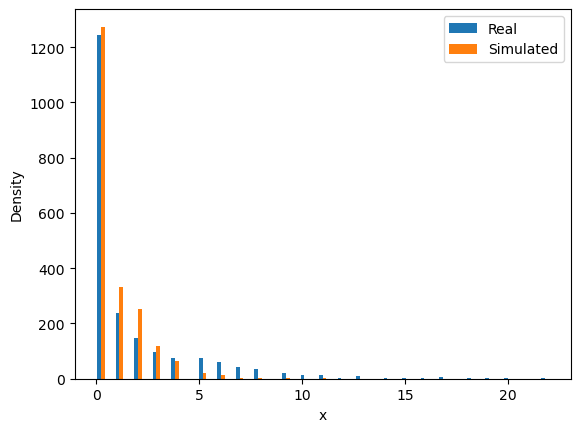

In [7]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 50) # sometimes simulates large outliers (like reads >10000)

In [8]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)

# NB Regression

In [9]:
from scdesigner.experimental.simulators.nb_regression import NegBinRegressionSimulator
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

In [10]:
formula = "~ bs(pseudotime, degree=5)"
model = NegBinRegressionSimulator()
params = model.estimate(example_sce, formula, epochs=50, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [11]:
print(model)

scDesigner object with n_obs x n_vars = 2087 x 100
    method: 'NBRegression'
    formula: '~ bs(pseudotime, degree=5)'
    parameters: 'coefficient', 'dispersion'


In [13]:
params["coefficient"]

Pyy      Iapp      Chgb      Rbp4  \
Intercept                    2.004122  2.094542  1.372600  1.592727   
bs(pseudotime, degree=5)[1] -7.904492 -6.708659 -5.926269 -9.479390   
bs(pseudotime, degree=5)[2]  0.408557 -6.670922  1.638484 -1.315107   
bs(pseudotime, degree=5)[3]  1.997858  0.446016  2.804847  1.964774   
bs(pseudotime, degree=5)[4]  2.400301  2.087755  2.683754  2.689841   
bs(pseudotime, degree=5)[5]  2.441004  2.459161  1.631847  2.242723   

                                  Spp1      Chga       Cck      Ins1  \
Intercept                     3.279739  0.747607  0.794146  1.908508   
bs(pseudotime, degree=5)[1]   2.472988 -8.526789  1.644348 -5.764563   
bs(pseudotime, degree=5)[2]  -4.189708  3.605336  3.244707 -5.412760   
bs(pseudotime, degree=5)[3] -10.899934  3.939086  2.478705 -7.063535   
bs(pseudotime, degree=5)[4]  -2.875542  2.528735 -0.082990  1.361187   
bs(pseudotime, degree=5)[5]  -4.194032  1.440708 -0.236683  2.365887   

                                 Nnat      Ins2  ...    Nkx6-1     Fxyd3  \
Intercept                    1.423896  1.460753  ...  0.260221 -0.120525   
bs(pseudotime, degree=5)[1] -4.259786 -8.006792  ... -0.009056 -1.679568   
bs(pseudotime, degree=5)[2] -0.785435 -6.668592  ...  2.854347  3.682104   
bs(pseudotime, degree=5)[3] -4.282811 -8.808233  ...  0.412907  0.935015   
bs(pseudotime, degree=5)[4]  1.227357  1.375566  ...  0.461670  0.865466   
bs(pseudotime, degree=5)[5]  2.779210  2.707181  ...  1.750310  0.369767   

                                  Hn1   Smarcd2     Pdia6     Ffar2      Hes6  \
Intercept                    1.029008 -0.347109  0.909288 -0.710548 -0.537028   
bs(pseudotime, degree=5)[1]  1.096825  2.681563  1.817682  0.858354  4.627252   
bs(pseudotime, degree=5)[2]  2.658057  3.756625 -1.791127  2.002196  2.866711   
bs(pseudotime, degree=5)[3] -1.695613 -0.685472 -3.213197  3.104697 -1.570228   
bs(pseudotime, degree=5)[4] -1.039982 -1.282296  1.153441  0.924166  1.809952   
bs(pseudotime, degree=5)[5] -0.303720 -0.411079  1.808978  0.480249  0.411194   

                             Serpinh1       Npy  1110012L19Rik  
Intercept                    1.518809 -1.943178      -0.568282  
bs(pseudotime, degree=5)[1]  0.489935 -4.745972      -2.600132  
bs(pseudotime, degree=5)[2]  0.874813 -3.791385       5.355726  
bs(pseudotime, degree=5)[3] -3.771745 -4.318643       3.512386  
bs(pseudotime, degree=5)[4] -2.768361 -4.404174      -3.248198  
bs(pseudotime, degree=5)[5] -1.523032  5.288521       0.219262  

[6 rows x 100 columns]

In [12]:
model.predict(params, example_sce.obs, formula)["coefficient"]

Pyy       Iapp       Chgb       Rbp4       Spp1  \
AAACCTGAGAGGGATA  36.079803   7.558312  31.774660  18.356491   0.092897   
AAACCTGGTAAGTGGC   3.174667   0.261756   5.030446   0.832230   0.461349   
AAACGGGCAAAGAATC  53.349614  18.721642  37.241879  31.457126   0.127104   
AAACGGGGTACAGTTC  81.922243  75.922855  28.295586  50.965726   0.428164   
AAACGGGGTGAAATCA   1.691517   0.159875   2.870608   0.402359   1.008439   
...                     ...        ...        ...        ...        ...   
TTTGGTTTCACTTACT   0.555816   0.518190   0.634187   0.190472  39.823254   
TTTGGTTTCCTTTCGG  63.058429  29.793103  37.726732  39.420443   0.172488   
TTTGTCAAGAATGTGT  41.257814  10.093964  33.968011  22.072621   0.098933   
TTTGTCAAGTGACATA  18.362295   2.211684  20.656800   7.407429   0.100309   
TTTGTCAAGTGTGGCA   0.901721   0.113871   1.592608   0.201859   2.465378   

                       Chga        Cck       Ins1       Nnat       Ins2  ...  \
AAACCTGAGAGGGATA  27.899238   8.126648   0.535480   1.773518   0.155754  ...   
AAACCTGGTAAGTGGC   3.872603  18.294539   0.054656   0.470401   0.008775  ...   
AAACGGGCAAAGAATC  27.695299   5.321627   1.776515   3.673668   0.675626  ...   
AAACGGGGTACAGTTC  13.492893   2.078733  35.002543  31.624750  26.091725  ...   
AAACGGGGTGAAATCA   1.832046  17.964704   0.052026   0.430019   0.007989  ...   
...                     ...        ...        ...        ...        ...  ...   
TTTGGTTTCACTTACT   0.167322   5.033622   0.607705   0.906663   0.164032  ...   
TTTGGTTTCCTTTCGG  24.908643   4.090836   3.871988   6.094736   1.750010  ...   
TTTGTCAAGAATGTGT  28.537830   7.179519   0.756077   2.174348   0.237710  ...   
TTTGTCAAGTGACATA  20.032069  12.488960   0.166330   0.913820   0.036806  ...   
TTTGTCAAGTGTGGCA   0.801766  16.281401   0.058178   0.414100   0.008846  ...   

                    Nkx6-1     Fxyd3       Hn1   Smarcd2      Pdia6     Ffar2  \
AAACCTGAGAGGGATA  3.454827  2.814100  1.706142  0.680509   1.362609  2.763675   
AAACCTGGTAAGTGGC  4.110610  2.987368  5.144456  3.426295   1.012415  2.922402   
AAACGGGCAAAGAATC  3.379190  2.355397  1.418012  0.467466   2.251876  2.178235   
AAACGGGGTACAGTTC  4.967409  1.523722  1.605362  0.370364  10.023693  1.012252   
AAACGGGGTGAAATCA  3.940214  2.540900  6.192575  4.334168   1.237103  2.557246   
...                    ...       ...       ...       ...        ...       ...   
TTTGGTTTCACTTACT  1.618279  0.677714  4.879602  2.298521   3.859873  0.785814   
TTTGGTTTCCTTTCGG  3.474321  2.101575  1.352631  0.399248   3.238529  1.821720   
TTTGTCAAGAATGTGT  3.407575  2.674735  1.592940  0.599806   1.560370  2.595241   
TTTGTCAAGTGACATA  3.765359  3.274858  2.433517  1.206912   0.941273  3.242814   
TTTGTCAAGTGTGGCA  3.581280  2.005186  7.062129  5.045635   1.617671  2.130811   

                      Hes6  Serpinh1       Npy  1110012L19Rik  
AAACCTGAGAGGGATA  1.271297  0.493841  0.007896       1.255089  
AAACCTGGTAAGTGGC  3.535536  1.921493  0.003070       3.572731  
AAACGGGCAAAGAATC  1.199819  0.428482  0.018672       0.646228  
AAACGGGGTACAGTTC  1.195616  0.647248  1.268672       0.321665  
AAACGGGGTGAAATCA  4.645780  2.634826  0.003232       2.942625  
...                    ...       ...       ...            ...  
TTTGGTTTCACTTACT  3.379524  5.556862  0.021012       0.369905  
TTTGGTTTCCTTTCGG  1.210173  0.429353  0.038513       0.450040  
TTTGTCAAGAATGTGT  1.234562  0.464632  0.009848       1.027332  
TTTGTCAAGTGACATA  1.601084  0.716748  0.004289       2.500975  
TTTGTCAAGTGTGGCA  5.896523  3.532660  0.003690       2.079854  

[2087 rows x 100 columns]

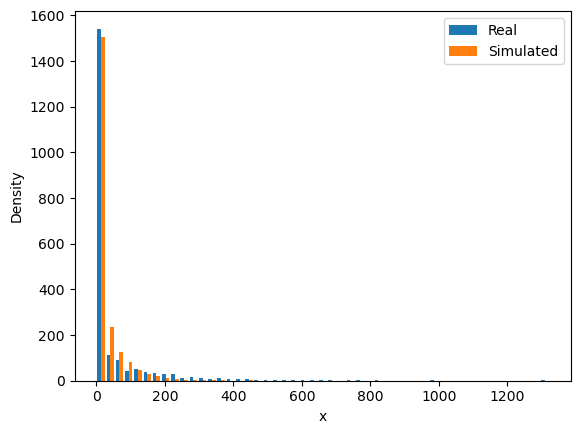

In [13]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 0)

In [14]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)

# NB Copula

In [ ]:
from scdesigner.experimental.simulators.nb_copula import NegBinCopulaSimulator
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

In [ ]:
formula = "~ bs(pseudotime, degree=5)"
model = NegBinCopulaSimulator()
params = model.estimate(example_sce, formula, epochs=50, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [17]:
print(model)

scDesigner object with n_obs x n_vars = 2087 x 100
    method: 'NBCopula'
    formula: '~ bs(pseudotime, degree=5)'
    copula formula: '~ 1'
    parameters: 'coefficient', 'dispersion', 'covariance'


In [18]:
model.predict(params, example_sce.obs, formula)["covariance"] # what to return? (especially when copula formula is not ~1?)

{'Intercept':                     Pyy      Iapp      Chgb      Rbp4      Spp1      Chga  \
 Pyy            1.955124  0.497418 -0.432671  0.789363 -0.259420  0.048084   
 Iapp           0.497418  1.577999 -0.163433  0.488911 -0.575354  0.434387   
 Chgb          -0.432671 -0.163433  1.283735 -0.213409  0.081500  0.255454   
 Rbp4           0.789363  0.488911 -0.213409  1.594468 -0.432347  0.258674   
 Spp1          -0.259420 -0.575354  0.081500 -0.432347  0.858308 -0.249555   
 ...                 ...       ...       ...       ...       ...       ...   
 Ffar2          0.042985  0.036949  0.123529 -0.009880  0.016091  0.122580   
 Hes6          -0.031609 -0.085572  0.076572 -0.129618  0.141614 -0.011404   
 Serpinh1       0.002190 -0.173750 -0.014244 -0.149435  0.195031 -0.137636   
 Npy           -0.118171 -0.112421  0.222822  0.244480 -0.077812  0.069730   
 1110012L19Rik  0.127698  0.009358 -0.045927  0.023842  0.055072  0.020553   
 
                     Cck      Ins1      Nnat     

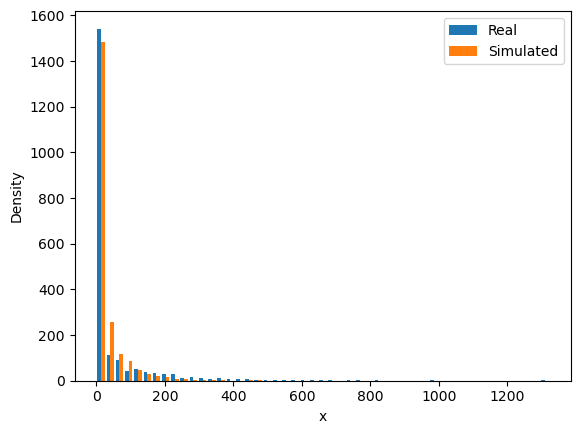

In [19]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 0)

In [20]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)